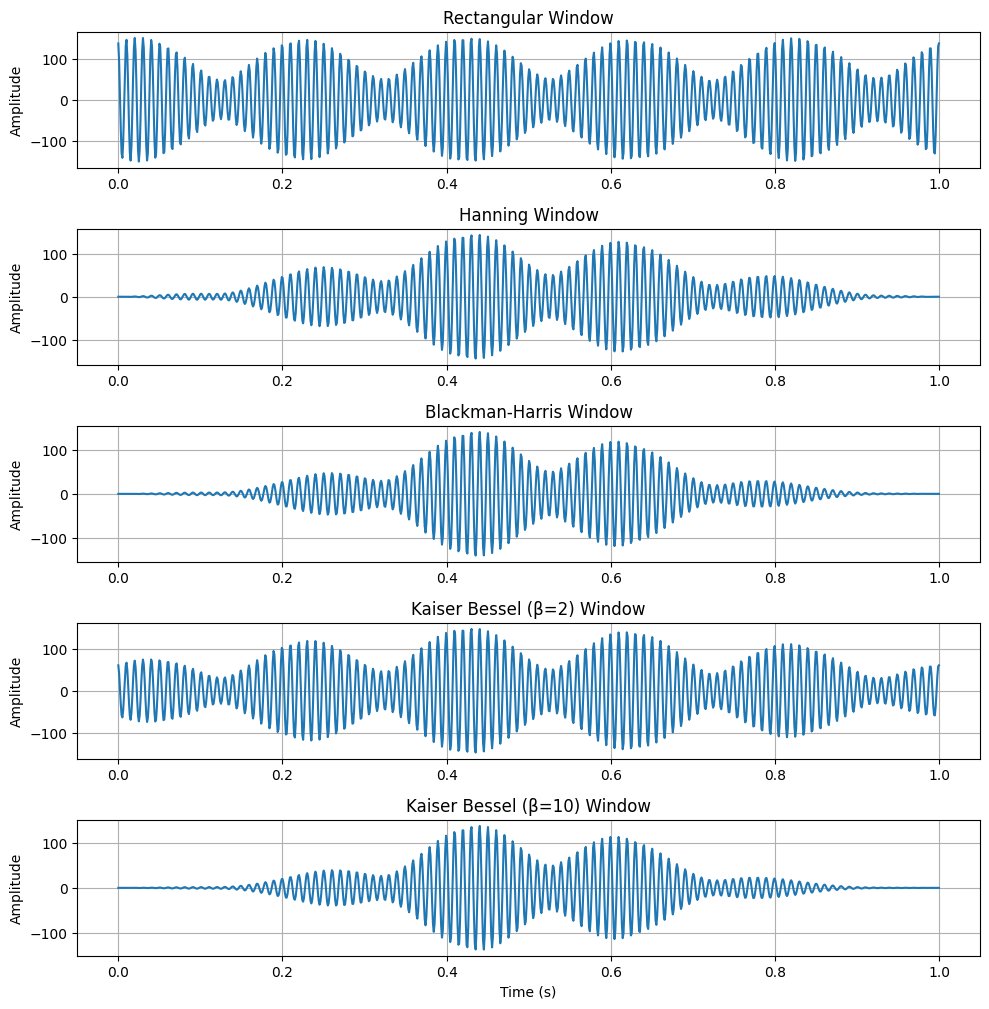

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 1  # seconds
sampling_rate = 1000  # Hz
num_samples = duration * sampling_rate
time = np.linspace(0, duration, num_samples)

# Simulate signal
signal = 100 * np.cos(2 * np.pi * 100 * time) + \
         3 * np.sin(2 * np.pi * 98 * time + np.pi/4) + \
         50 * np.cos(2 * np.pi * 95 * time + np.pi/4)

# # Plot original signal
# plt.figure(figsize=(10, 5))
# plt.plot(time, signal, label='Original Signal')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Original Signal')
# plt.legend()
# plt.grid(True)
# plt.show()

# Window functions
windows = [
    np.ones(num_samples),  # Rectangular window
    np.hanning(num_samples),  # Hanning (Hann) window
    np.blackman(num_samples),  # Blackman-Harris window
    np.kaiser(num_samples, beta=2),  # Kaiser Bessel with Beta = 2
    np.kaiser(num_samples, beta=10)  # Kaiser Bessel with Beta = 10
]

# Plot windowed versions
window_names = ['Rectangular', 'Hanning', 'Blackman-Harris', 'Kaiser Bessel (β=2)', 'Kaiser Bessel (β=10)']
plt.figure(figsize=(10, 10))
for i, window in enumerate(windows):
    plt.subplot(5, 1, i + 1)
    plt.plot(time, signal * window)
    plt.title(window_names[i] + ' Window')
#     plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
# plt.suptitle('Simulation of Various Window Function')
plt.tight_layout()
plt.xlabel('Time (s)')

plt.savefig('different-windows.png',dpi = 300, bbox_inches = 'tight')



In [8]:
def fft(signal, fs):
    
    fft_result = np.fft.fft(signal)
    fft_result = np.abs(fft_result)/(0.5*len(fft_result))
    fft_result = fft_result[0:int(len(fft_result)/2)+1]
    freq = np.linspace(0,fs/2,len(fft_result))
    
    return freq, fft_result


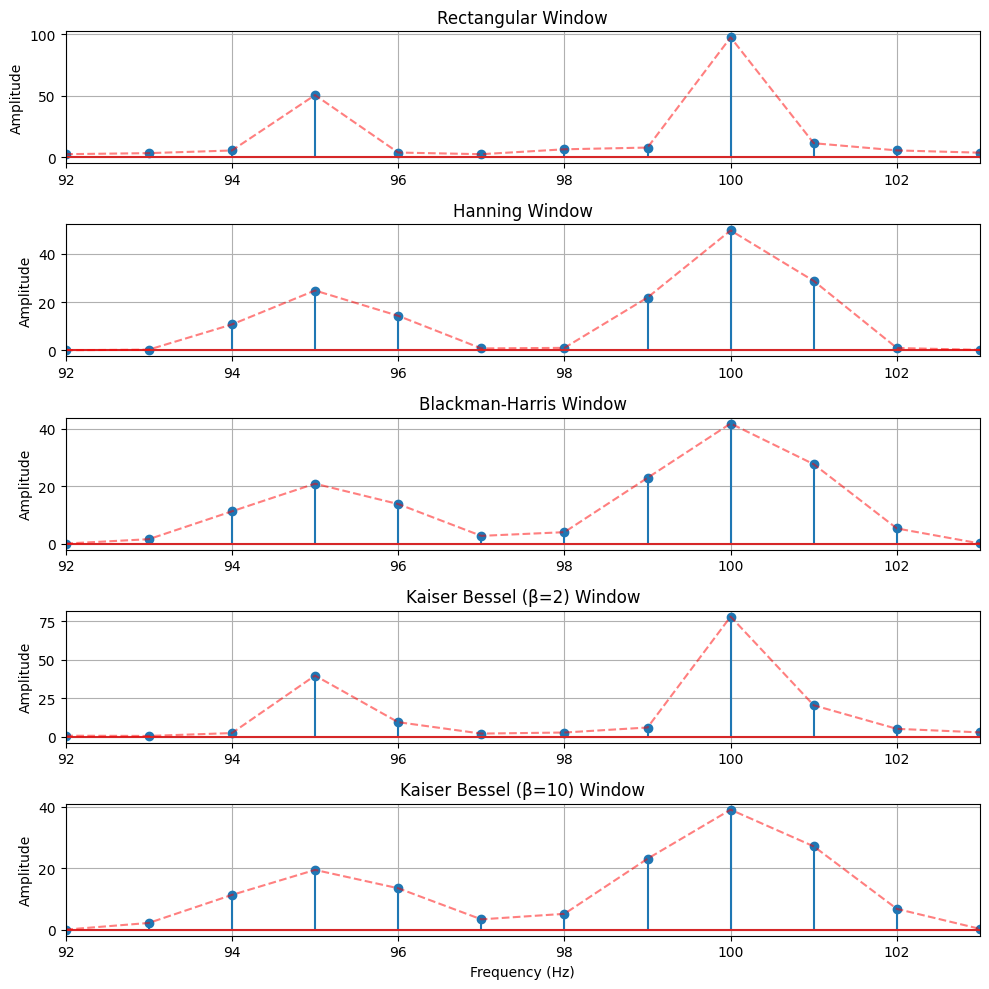

In [9]:
plt.figure(figsize=(10, 10))

for i, window in enumerate(windows):
    
    freq, amplitude = fft(signal*window,1000)
    plt.subplot(5, 1, i + 1)
    plt.stem(freq, amplitude)
    plt.plot(freq, amplitude,'--',alpha = 0.5, color = 'red')
    plt.title(window_names[i] + ' Window')
#     plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(92,103)
    plt.grid(True)
plt.xlabel('Frequency (Hz)')

plt.tight_layout()

# plt.savefig('Fourier Transform-windows.png',dpi = 300, bbox_inches = 'tight')

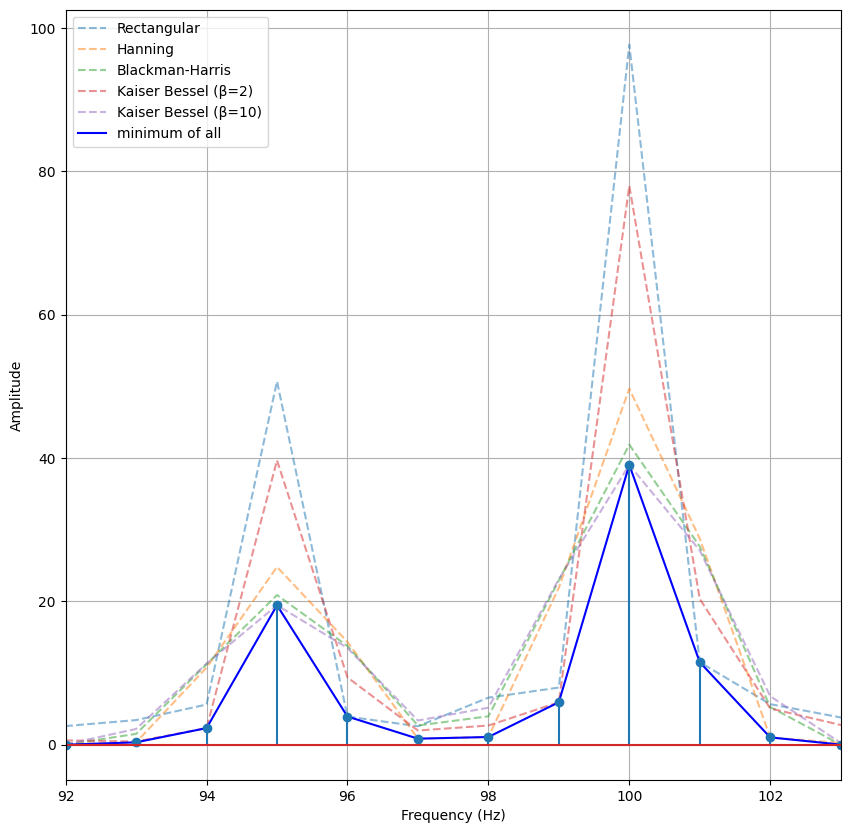

In [28]:
plt.figure(figsize=(10, 10))



    
window_fft  = []

for i, window in enumerate(windows):
    
    freq, amplitude = fft(signal*window,1000)
    window_fft.append(amplitude)


# Create a new array to store the minimum values
min_array = []

# Iterate through the arrays and find the minimum value for each index
for i in range(500):
    min_value = min(window_fft[0][i], window_fft[1][i], window_fft[2][i], window_fft[3][i], window_fft[4][i])
    min_array.append(min_value)
    
for i, window in enumerate(windows):
    
    freq, amplitude = fft(signal*window,1000)
    plt.plot(freq, amplitude,'--',alpha = 0.5, label = window_names[i])

plt.plot(min_array, label = 'minimum of all', color = 'blue')
plt.stem(min_array)
plt.ylabel('Amplitude')
plt.xlim(92,103)
plt.grid(True)
plt.xlabel('Frequency (Hz)')

plt.legend()

plt.savefig('Minimum.png',dpi = 300, bbox_inches = 'tight')

0.2749819469161192